# Random Forest Classification

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result. Random forest can be used for both classification and regression problems

# Problem:
Conversion Rate is calculated based on EmailSent, Open Rate, Click Rate

In [1]:
pwd

'C:\\Users\\User\\Git-Hup Files\\Machine Learning Classification'

In [2]:
cd C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing

C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing


In [3]:
#Import all the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import Data set from the local directory
df = pd.read_csv("EmailClassification.csv")

In [5]:
df.head(10)

,Email_ID,Month,Email_Sent,Open_Rate,Click_Rate,Conversion_Rate
0,EMA00081000168000,Jan,873,42,14,0
1,EMA00081000187610,Feb,630,32,26,1
2,EMA00081000244770,Mar,988,21,8,0
3,EMA00081000245260,Apr,339,25,9,0
4,EMA00081000264690,May,1157,30,31,1
5,EMA00081000337110,Jun,1157,25,31,1
6,EMA00081000390580,Jul,962,78,27,0
7,EMA00081000445960,Jan,578,17,11,0
8,EMA00081000581770,Feb,1173,33,21,1
9,EMA00081000587870,Mar,1173,23,2,0


In [6]:
#defining X and Y
x = df.iloc[:,2:-1]
y= df.iloc[:, -1]

In [7]:
x.head(10)

,Email_Sent,Open_Rate,Click_Rate
0,873,42,14
1,630,32,26
2,988,21,8
3,339,25,9
4,1157,30,31
5,1157,25,31
6,962,78,27
7,578,17,11
8,1173,33,21
9,1173,23,2


In [8]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x , y, test_size=0.2, random_state=0)

In [9]:
# Training the Model
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 10, criterion='entropy',random_state = 0)
Classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<b>bootstrapbool</b>, default=True
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.<br/>
<b>n_estimators</b> : The number of trees in the forest.
<b>criterion</b> : The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.<br/>
<b>splitter </b>='best'Supported strategies are “best” to choose the best split and “random” to choose the best random split.<br/>
<b>max_depth : int, default=None </b> : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.<br/>
<b>min_samples_splitint or float, default=2 </b>
The minimum number of samples required to split an internal node:<br/>
<b>min_samples_leaf=1</b> : The minimum number of samples required to be at a leaf node.<br/>
<b>min_weight_fraction_leaf=0.0</b> : The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.<br/>
<b>random_stateint, RandomState instance, default=None </b>
Controls the randomness of the estimator<br/>
<b>class_weightdict, list of dict or “balanced”, default=None</b>Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].<br/>
<b>ccp_alphanon-negative float, default=0.0</b>
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.


In [10]:
#prediction on random sample
Classifier.predict([[1579,823,456]])

array([0], dtype=int64)

In [11]:
y_pred = Classifier.predict(x_test)

In [12]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

[[30  0]
 [ 4  6]]


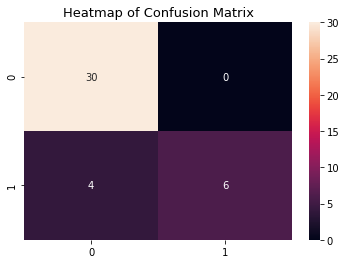

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Heatmap of Confusion Matrix', fontsize=13)
sns.heatmap(cm, annot=True)
plt.show()


In [14]:
#Prediction and Evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.60      0.75        10

    accuracy                           0.90        40
   macro avg       0.94      0.80      0.84        40
weighted avg       0.91      0.90      0.89        40



In [15]:
#Accuracy
accuracy_score(y_test, y_pred) 

0.9

In [16]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = 10)
print("accuracies: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

accuracies: 88.08 %
Standard Deviation: 6.49 %
